In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
#get current working directory
os.getcwd()

'C:\\Users\\HP'

In [3]:
os.chdir('D:\\Used Cars')

In [4]:
os.getcwd()

'D:\\Used Cars'

In [5]:
#read and view data 
data=pd.read_csv('usedcars.csv')
data.head()

,name,year,price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [6]:
data.shape

(8128, 12)

In [7]:
data.columns

Index(['name', 'year', 'price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [8]:
data.describe()

,year,price,km_driven,mileage,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [9]:
data.dtypes

name             object
year              int64
price             int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
mileage         float64
engine          float64
max_power        object
seats           float64
dtype: object

In [10]:
duplicates = data.duplicated()
duplicates.sum()

1202

In [11]:
data = data[~duplicates]
data.duplicated().sum()

0

In [12]:
data=data.astype({'price': 'float64', 'km_driven': 'float64'})
data

,name,year,price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000.0,50000.0,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000.0,80000.0,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000.0,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [13]:
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')
data.dtypes

name             object
year              int64
price           float64
km_driven       float64
fuel             object
seller_type      object
transmission     object
owner            object
mileage         float64
engine          float64
max_power       float64
seats           float64
dtype: object

In [14]:
data=data.astype({'fuel': 'category', 'seller_type': 'category','transmission': 'category', 'owner': 'category'})
data.dtypes

name              object
year               int64
price            float64
km_driven        float64
fuel            category
seller_type     category
transmission    category
owner           category
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [15]:
data.apply(lambda x:len(x.unique()))

name            2058
year              29
price            677
km_driven        921
fuel               4
seller_type        3
transmission       2
owner              5
mileage          382
engine           122
max_power        320
seats             10
dtype: int64

In [16]:
data.isna().sum()

name              0
year              0
price             0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         208
engine          208
max_power       206
seats           208
dtype: int64

In [17]:
#Missing values treatmeant

In [18]:
data = data.dropna(subset=['mileage', 'engine', 'max_power', 'seats'])
data.shape

(6717, 12)

In [19]:
data.isna().sum()

name            0
year            0
price           0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [20]:
#Exploratory Data analysis

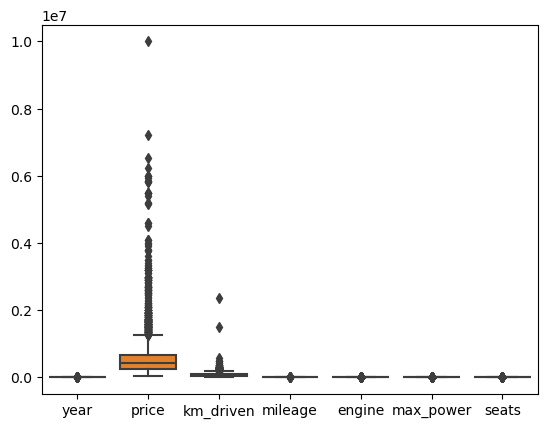

In [21]:
#Boxplot of all numeric data
sns.boxplot(data)
plt.show()

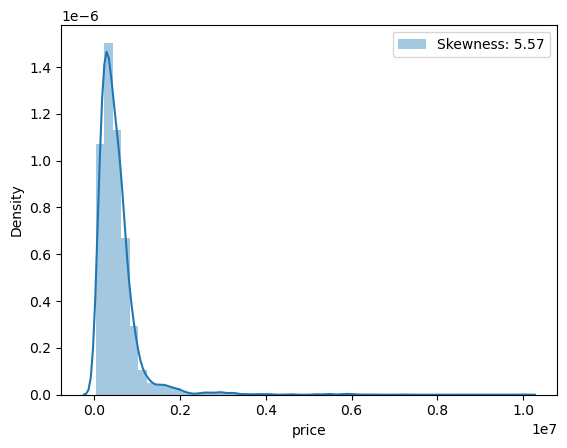

In [22]:
#Distplot of price column with skewness
sns.distplot(data['price'], label='Skewness: %.2f' %(data['price'].skew()))
plt.legend(loc = 'best')
plt.show()

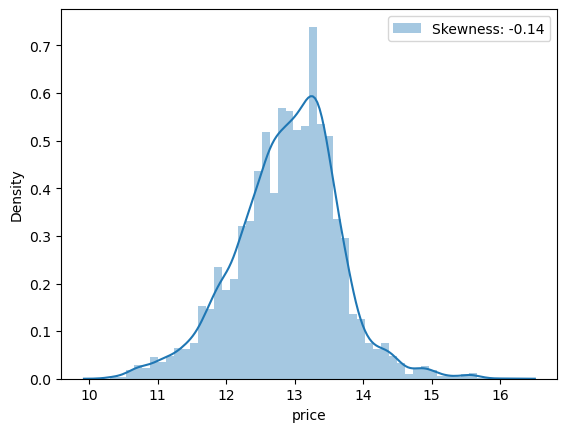

In [23]:
#Apply log tranformation to reduce skewness
data['price'] = np.log(1+data['price'])
sns.distplot(data['price'], label='Skewness: %.2f' %(data['price'].skew()))
plt.legend(loc = 'best')
plt.show()

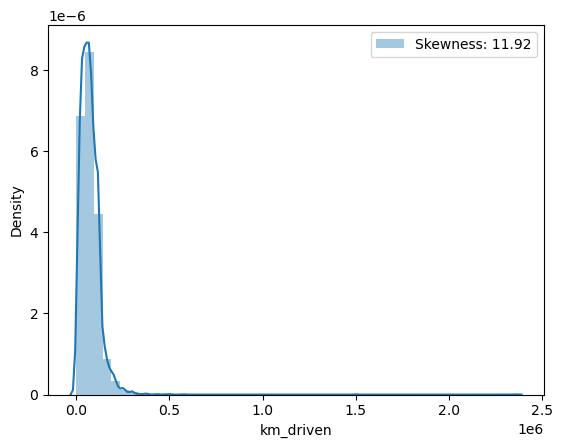

In [24]:
#Distplot of km_driven column with skewness
sns.distplot(data['km_driven'], label='Skewness: %.2f' %(data['km_driven'].skew()))
plt.legend(loc = 'best')
plt.show()

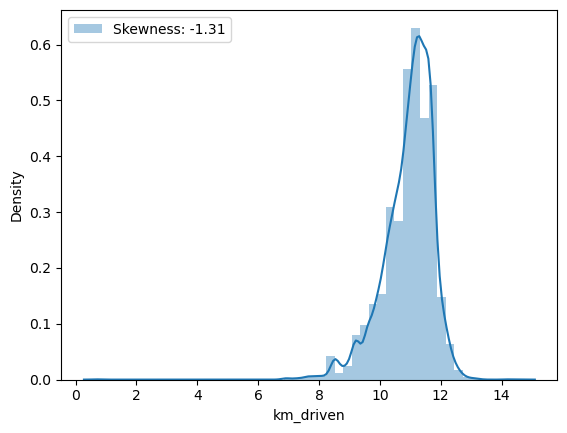

In [25]:
#Apply log tranformation to reduce skewness
data['km_driven'] = np.log(1+data['km_driven'])
sns.distplot(data['km_driven'], label='Skewness: %.2f' %(data['km_driven'].skew()))
plt.legend(loc = 'best')
plt.show()

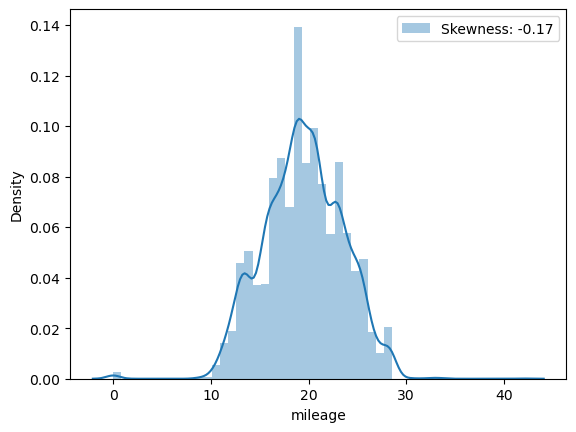

In [26]:
#Distplot of mileage column with skewness
sns.distplot(data['mileage'], label='Skewness: %.2f' %(data['mileage'].skew()))
plt.legend(loc = 'best')
plt.show()

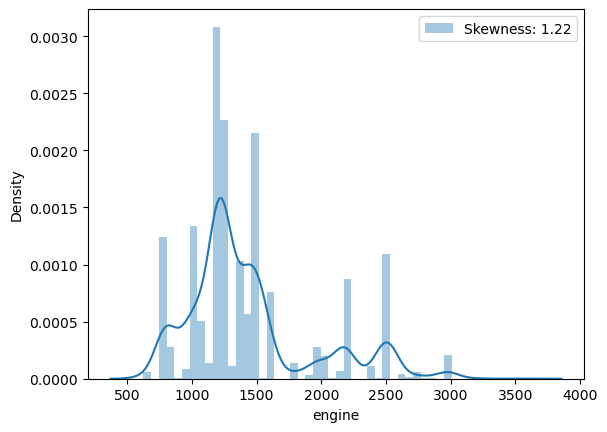

In [27]:
#Distplot of engine column with skewness
sns.distplot(data['engine'], label='Skewness: %.2f' %(data['engine'].skew()))
plt.legend(loc = 'best')
plt.show()

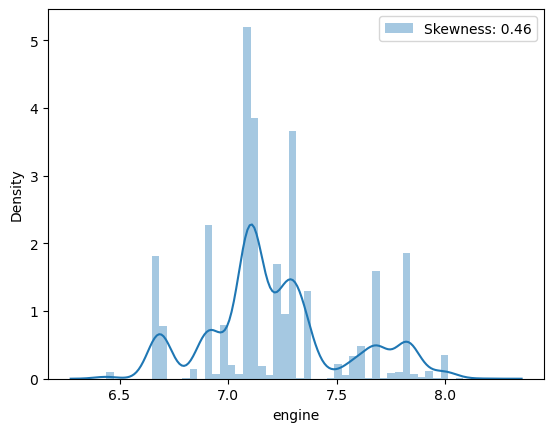

In [28]:
#Apply log transformation to reduce skewness
data['engine'] = np.log(1+data['engine'])
sns.distplot(data['engine'], label='Skewness: %.2f' %(data['engine'].skew()))
plt.legend(loc = 'best')
plt.show()

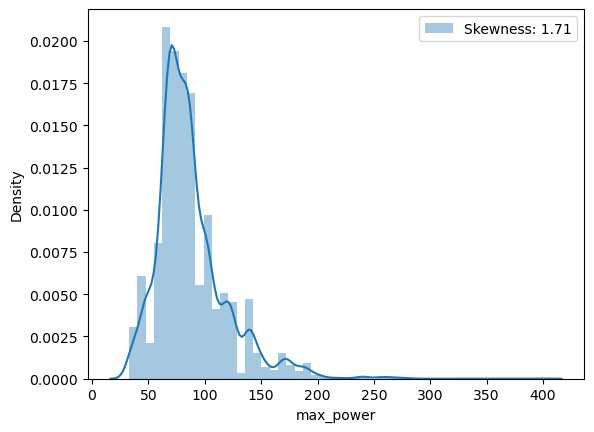

In [29]:
#Distplot of max_power column with skewness
sns.distplot(data['max_power'], label='Skewness: %.2f' %(data['max_power'].skew()))
plt.legend(loc = 'best')
plt.show()

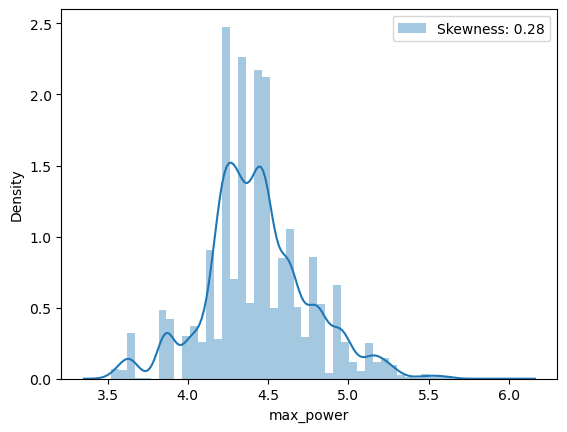

In [30]:
#Apply log transformation to reduce skewness
data['max_power'] = np.log(1+data['max_power'])
sns.distplot(data['max_power'], label='Skewness: %.2f' %(data['max_power'].skew()))
plt.legend(loc = 'best')
plt.show()

In [31]:
#Convert year to age
data['year'].head()

0    2014
1    2014
2    2006
3    2010
4    2007
Name: year, dtype: int64

In [32]:
age=[]
for x in data['year']:
    age.append(2024-x)
data['age']=age
del data['year']
data.head()

,name,price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,13.017005,11.887938,Diesel,Individual,Manual,First Owner,23.40,7.130099,4.317488,5.0,10
1,Skoda Rapid 1.5 TDI Ambition,12.821261,11.695255,Diesel,Individual,Manual,Second Owner,21.14,7.312553,4.649378,5.0,10
2,Honda City 2017-2020 EXi,11.970357,11.849405,Petrol,Individual,Manual,Third Owner,17.70,7.311886,4.369448,5.0,18
3,Hyundai i20 Sportz Diesel,12.323860,11.751950,Diesel,Individual,Manual,First Owner,23.00,7.242082,4.510860,5.0,14
4,Maruti Swift VXI BSIII,11.775297,11.695255,Petrol,Individual,Manual,First Owner,16.10,7.169350,4.490881,5.0,17


In [33]:
#Distplot of age column with skewness
'''sns.distplot(data['age'], label='Skewness: %.2f' %(data['age'].skew()))
plt.legend(loc = 'best')
plt.show()'''

"sns.distplot(data['age'], label='Skewness: %.2f' %(data['age'].skew()))\nplt.legend(loc = 'best')\nplt.show()"

In [34]:
'''#Apply log tranformation to reduce skewness
data['age'] = np.log(1+data['age'])
sns.distplot(data['age'], label='Skewness: %.2f' %(data['age'].skew()))
plt.legend(loc = 'best')
plt.show()'''

"#Apply log tranformation to reduce skewness\ndata['age'] = np.log(1+data['age'])\nsns.distplot(data['age'], label='Skewness: %.2f' %(data['age'].skew()))\nplt.legend(loc = 'best')\nplt.show()"

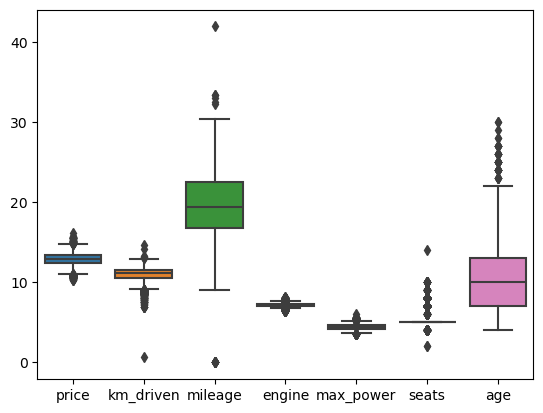

In [35]:
sns.boxplot(data)
plt.show()

In [36]:
#Check categorical data
data.dtypes

name              object
price            float64
km_driven        float64
fuel            category
seller_type     category
transmission    category
owner           category
mileage          float64
engine           float64
max_power        float64
seats            float64
age                int64
dtype: object

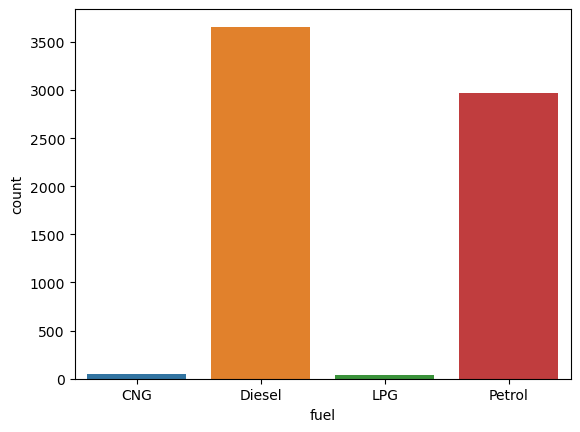

In [37]:
#Countplot of fuel
sns.countplot(x=data['fuel'])
plt.show()

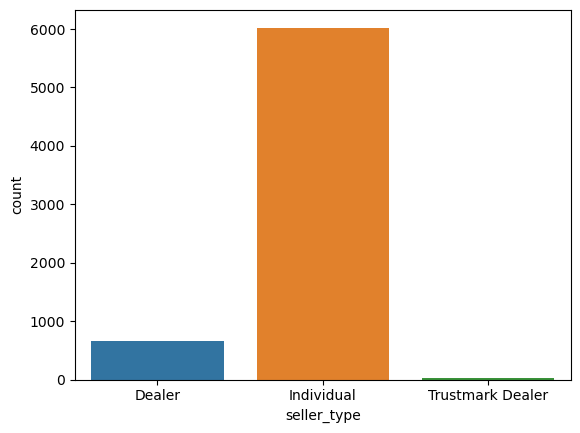

In [38]:
#Count plot of seller_type
sns.countplot(x=data['seller_type'])
plt.show()

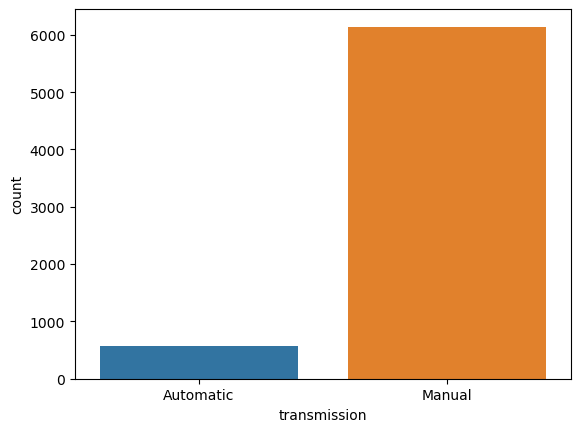

In [39]:
#Count plot of transmission
sns.countplot(x=data['transmission'])
plt.show()

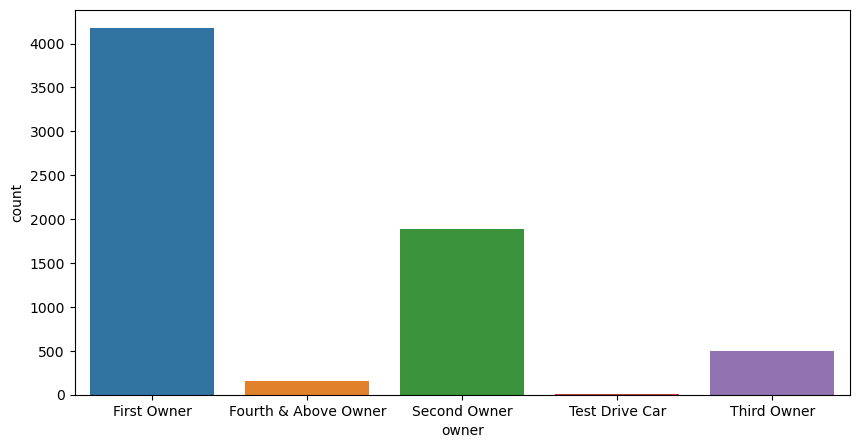

In [40]:
#Countplot of owner
plt.figure(figsize=(10,5))
sns.countplot(x=data['owner'])
plt.show()

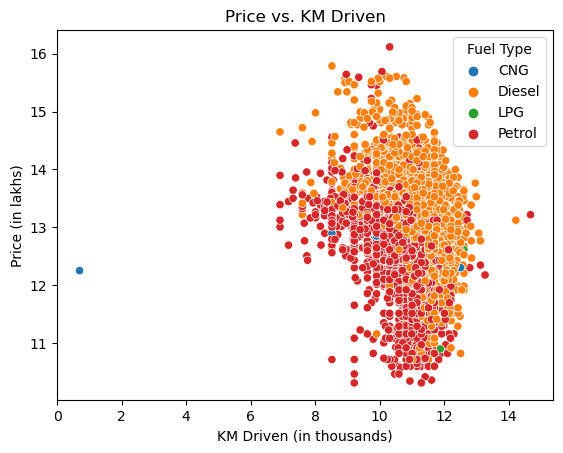

In [41]:
# Scatter plot: price vs. km_driven
sns.scatterplot(data=data, x='km_driven', y='price', hue='fuel')
plt.title('Price vs. KM Driven')
plt.xlabel('KM Driven (in thousands)')
plt.ylabel('Price (in lakhs)')
plt.legend(title='Fuel Type')
plt.show()

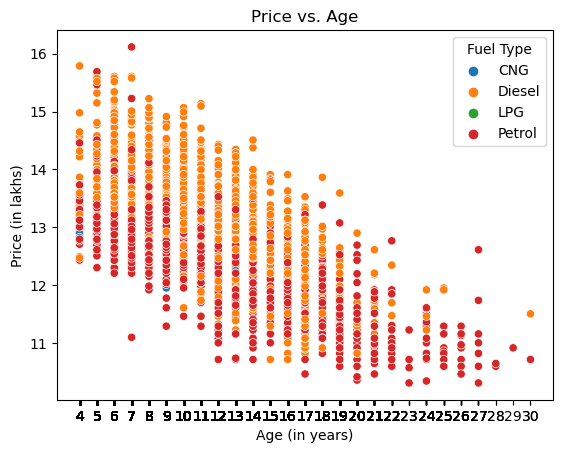

In [42]:
# Scatter plot: price vs. age
sns.scatterplot(data=data, x='age', y='price', hue='fuel')
plt.title('Price vs. Age')
plt.xlabel('Age (in years)')
plt.xticks(data['age'].values)
plt.ylabel('Price (in lakhs)')
plt.legend(title='Fuel Type')
plt.show()

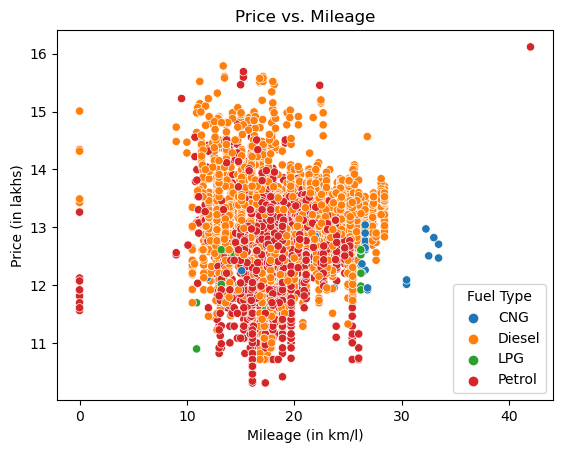

In [43]:
# Scatter plot: price vs. mileage
sns.scatterplot(data=data, x='mileage', y='price', hue='fuel')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (in km/l)')
plt.ylabel('Price (in lakhs)')
plt.legend(title='Fuel Type')
plt.show()

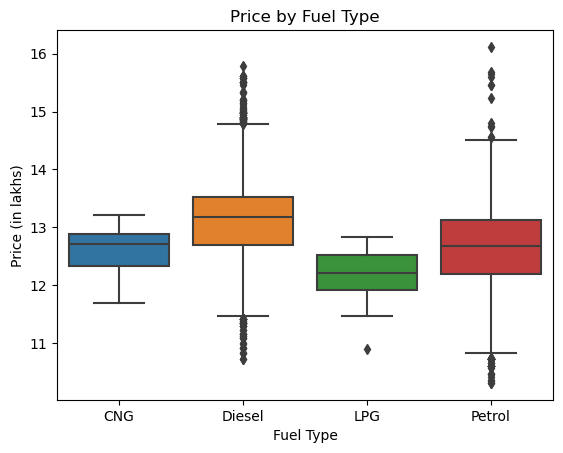

In [44]:
# Box plot: price by fuel
sns.boxplot(data=data, x='fuel', y='price')
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in lakhs)')
plt.show()

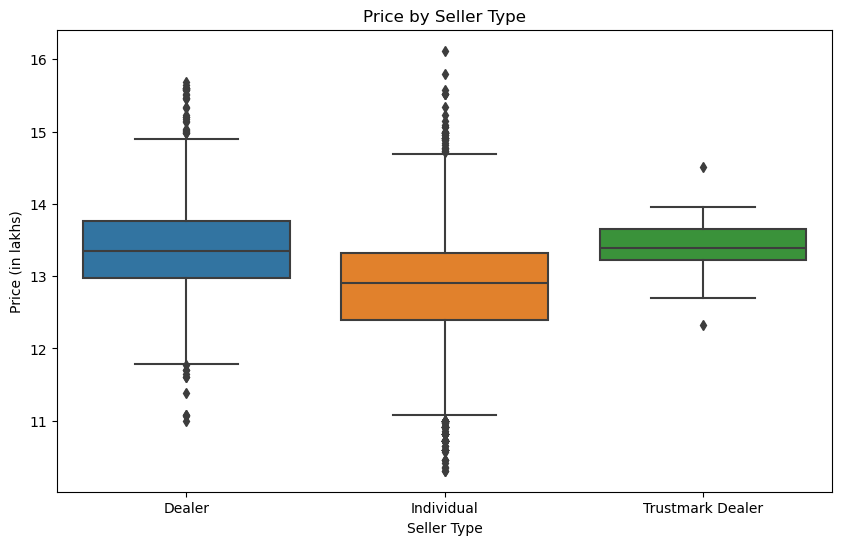

In [45]:
# Box plot: price by seller_type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='seller_type', y='price')
plt.title('Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Price (in lakhs)')
plt.show()

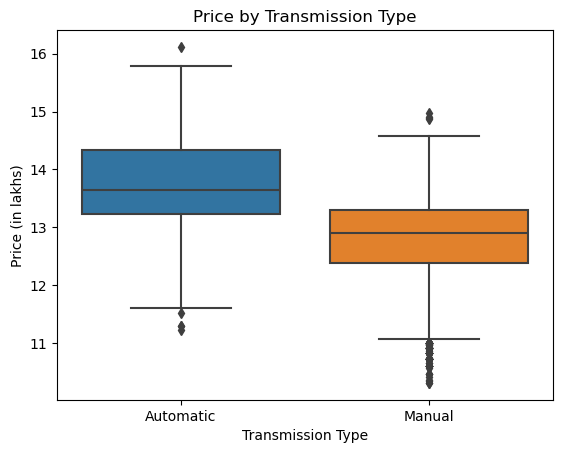

In [46]:
# Box plot: price by transmission
sns.boxplot(data=data, x='transmission', y='price')
plt.title('Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (in lakhs)')
plt.show()

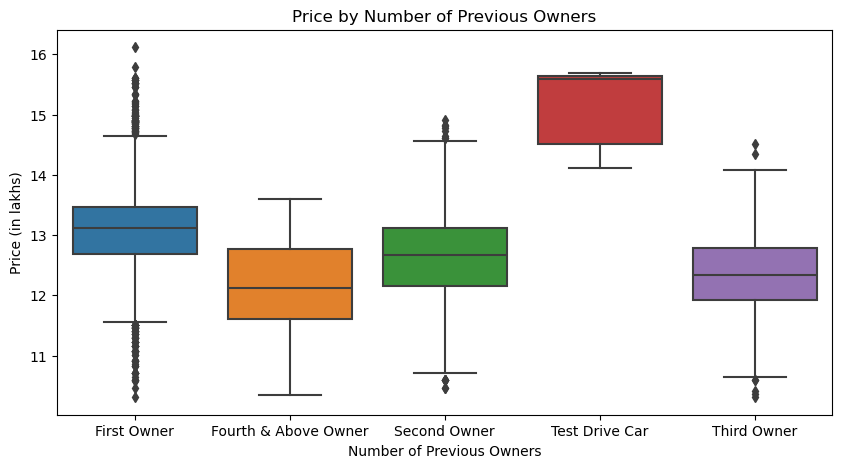

In [47]:
# Box plot: price by owner
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='owner', y='price')
plt.title('Price by Number of Previous Owners')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Price (in lakhs)')
plt.show()

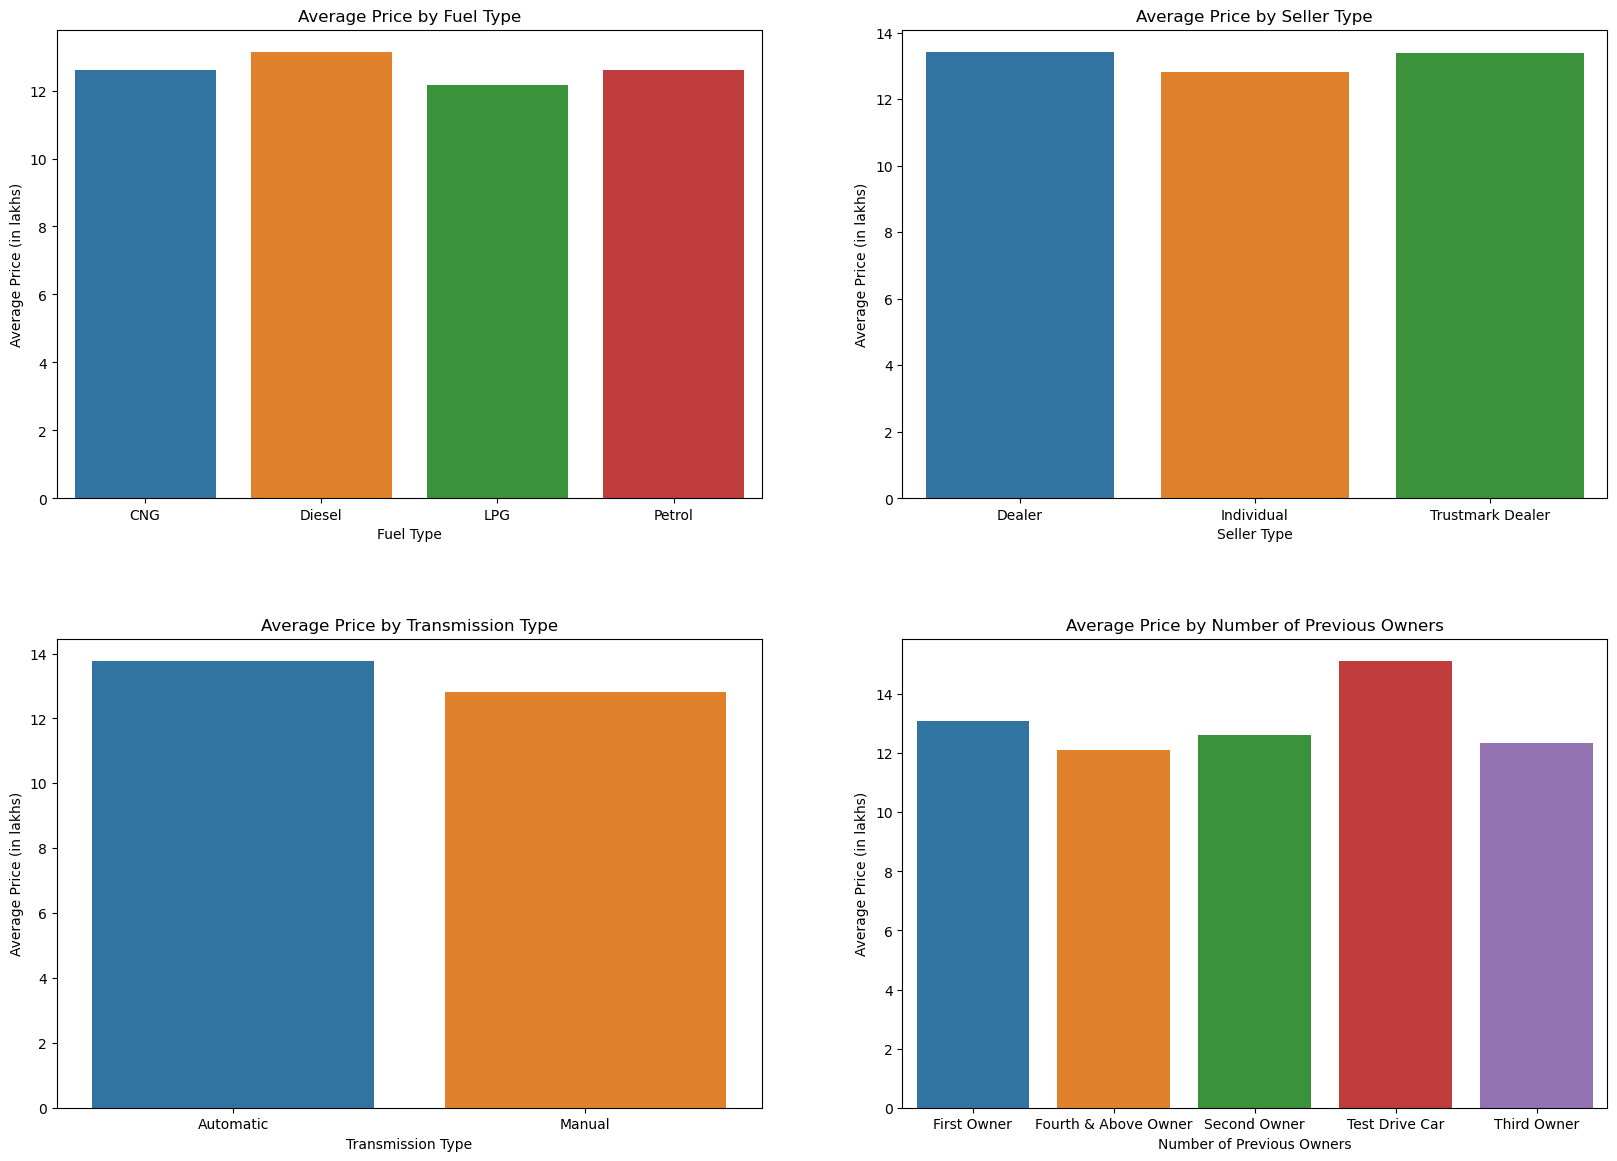

In [48]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Bar plot: average price by fuel
sns.barplot(data=data, x='fuel', y='price', estimator='mean', ci=None, ax=axs[0, 0])
axs[0, 0].set_title('Average Price by Fuel Type')
axs[0, 0].set_xlabel('Fuel Type')
axs[0, 0].set_ylabel('Average Price (in lakhs)')

# Bar plot: average price by seller_type
sns.barplot(data=data, x='seller_type', y='price', estimator='mean', ci=None, ax=axs[0, 1])
axs[0, 1].set_title('Average Price by Seller Type')
axs[0, 1].set_xlabel('Seller Type')
axs[0, 1].set_ylabel('Average Price (in lakhs)')

# Bar plot: average price by transmission
sns.barplot(data=data, x='transmission', y='price', estimator='mean', ci=None, ax=axs[1, 0])
axs[1, 0].set_title('Average Price by Transmission Type')
axs[1, 0].set_xlabel('Transmission Type')
axs[1, 0].set_ylabel('Average Price (in lakhs)')

# Bar plot: average price by owner
sns.barplot(data=data, x='owner', y='price', estimator='mean', ci=None, ax=axs[1, 1])
axs[1, 1].set_title('Average Price by Number of Previous Owners')
axs[1, 1].set_xlabel('Number of Previous Owners')
axs[1, 1].set_ylabel('Average Price (in lakhs)')

# Adjust layout and add spacing
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [49]:
#Correlation of numeric data

In [50]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = numeric_columns.tolist()
corr = data[num_cols].corr()
display (corr)

,price,km_driven,mileage,engine,max_power,seats,age
price,1.000000,-0.272625,0.016791,0.510660,0.681555,0.268453,-0.708913
km_driven,-0.272625,1.000000,-0.174641,0.253652,0.035016,0.197945,0.505383
mileage,0.016791,-0.174641,1.000000,-0.539443,-0.342031,-0.459188,-0.366048
engine,0.510660,0.253652,-0.539443,1.000000,0.745022,0.615727,-0.012435
max_power,0.681555,0.035016,-0.342031,0.745022,1.000000,0.277121,-0.210894
seats,0.268453,0.197945,-0.459188,0.615727,0.277121,1.000000,-0.025021
age,-0.708913,0.505383,-0.366048,-0.012435,-0.210894,-0.025021,1.000000


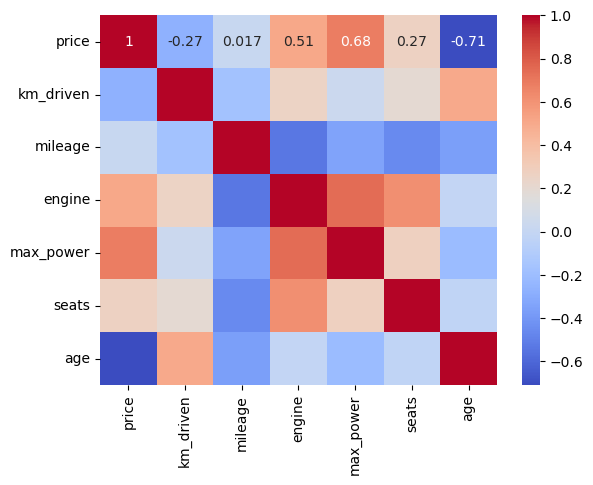

In [51]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [52]:
# Label Encoding

In [53]:
cat_col = ['name']
le = LabelEncoder()
for col in cat_col:
    data[col] = le.fit_transform(data[col])
data

,name,price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,1249,13.017005,11.887938,Diesel,Individual,Manual,First Owner,23.40,7.130099,4.317488,5.0,10
1,1546,12.821261,11.695255,Diesel,Individual,Manual,Second Owner,21.14,7.312553,4.649378,5.0,10
2,375,11.970357,11.849405,Petrol,Individual,Manual,Third Owner,17.70,7.311886,4.369448,5.0,18
3,743,12.323860,11.751950,Diesel,Individual,Manual,First Owner,23.00,7.242082,4.510860,5.0,14
4,1290,11.775297,11.695255,Petrol,Individual,Manual,First Owner,16.10,7.169350,4.490881,5.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1350,12.468441,10.819798,Petrol,Individual,Manual,Second Owner,18.90,6.906755,4.220977,5.0,11
8122,735,13.071072,11.289794,Diesel,Individual,Manual,Second Owner,22.54,7.242082,4.496805,5.0,10
8123,733,12.676079,11.608245,Petrol,Individual,Manual,First Owner,18.50,7.088409,4.429029,5.0,11
8124,618,11.813037,11.686887,Diesel,Individual,Manual,Fourth & Above Owner,16.80,7.309212,4.709530,5.0,17


In [54]:
# One hot Encoding

In [55]:
dt=pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'owner'] ,dtype = int )
display (dt.head())

,name,price,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1249,13.017005,11.887938,23.40,7.130099,4.317488,5.0,10,0,1,...,0,1,0,0,1,1,0,0,0,0
1,1546,12.821261,11.695255,21.14,7.312553,4.649378,5.0,10,0,1,...,0,1,0,0,1,0,0,1,0,0
2,375,11.970357,11.849405,17.70,7.311886,4.369448,5.0,18,0,0,...,0,1,0,0,1,0,0,0,0,1
3,743,12.323860,11.751950,23.00,7.242082,4.510860,5.0,14,0,1,...,0,1,0,0,1,1,0,0,0,0
4,1290,11.775297,11.695255,16.10,7.169350,4.490881,5.0,17,0,0,...,0,1,0,0,1,1,0,0,0,0


In [56]:
#Normalizing data and creating the independent varibales
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nor=dt.drop(columns=['price'])
X=pd.DataFrame(scaler.fit_transform(nor), columns=nor.columns)
X

,name,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.630490,0.800702,0.557143,0.395102,0.322226,0.25,0.230769,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.780414,0.786921,0.503333,0.499223,0.456405,0.25,0.230769,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.189298,0.797946,0.421429,0.498843,0.343233,0.25,0.538462,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.375063,0.790976,0.547619,0.459008,0.400404,0.25,0.384615,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.651186,0.786921,0.383333,0.417501,0.392327,0.25,0.500000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,0.681474,0.724304,0.450000,0.267646,0.283209,0.25,0.269231,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6713,0.371025,0.757920,0.536667,0.459008,0.394722,0.25,0.230769,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6714,0.370015,0.780697,0.440476,0.371311,0.367321,0.25,0.269231,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6715,0.311964,0.786322,0.400000,0.497317,0.480723,0.25,0.500000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [57]:
#Dependent variable
Y=dt['price']
Y.head()

0    13.017005
1    12.821261
2    11.970357
3    12.323860
4    11.775297
Name: price, dtype: float64

In [58]:
#Train Test Split 
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(6717, 21) (6717,)
(5373, 21) (5373,)
(1344, 21) (1344,)


In [59]:
#Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
print(lr)

LinearRegression()


In [61]:
#Prediction with Test Data 
y_pred=lr.predict(X_test)
y_pred

array([13.2011854 , 12.52068016, 12.60605438, ..., 12.28027142,
       12.93524379, 13.01007533])

In [62]:
result=pd.DataFrame({'Predicted': y_pred, 'Actual': Y_test})
result

,Predicted,Actual
5162,13.201185,12.765691
3707,12.520680,12.100718
2146,12.606054,12.706851
2955,12.947889,13.093966
5387,12.694843,12.834684
...,...,...
6909,12.762006,12.611541
2306,12.459370,12.128117
7082,12.280271,12.611541
1205,12.935244,13.144127


In [63]:
#Accuracy and Mean Absolute Error 
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y_test, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.8383791203067052
Mean Absolute Error 0.23194524181766993


In [64]:
#Prediction for complete data set 
y_pred=lr.predict(X)
y_pred

array([12.84494299, 13.10796441, 11.7864145 , ..., 12.63792939,
       12.34456798, 12.30536952])

In [65]:
#Accuracy and Mean Absolute Error of complete data
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y,y_pred))

R2 Score  0.8400606861676903
Mean Absolute Error 0.22963331449527394


In [66]:
dt_pred=pd.concat([X, Y], axis=1)
dt_pred=pd.concat([dt_pred, pd.DataFrame(y_pred)], axis=1)
dt_pred.head()

,name,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,price,0
0,0.630490,0.800702,0.557143,0.395102,0.322226,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,13.017005,12.844943
1,0.780414,0.786921,0.503333,0.499223,0.456405,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.821261,13.107964
2,0.189298,0.797946,0.421429,0.498843,0.343233,0.25,0.538462,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.970357,11.786414
3,0.375063,0.790976,0.547619,0.459008,0.400404,0.25,0.384615,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12.323860,12.642414
4,0.651186,0.786921,0.383333,0.417501,0.392327,0.25,0.500000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.775297,12.088506


In [67]:
# Decision Tree Regression

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
dtr

DecisionTreeRegressor()

In [69]:
#Prediction with Test Data 
y_pred=dtr.predict(X_test)
y_pred

array([13.087774  , 11.69525536, 12.9598468 , ..., 12.89922233,
       13.17115545, 12.89922233])

In [70]:
result=pd.DataFrame({'Predicted': y_pred, 'Actual': Y_test})
result

,Predicted,Actual
5162,13.087774,12.765691
3707,11.695255,12.100718
2146,12.959847,12.706851
2955,12.873905,13.093966
5387,12.206078,12.834684
...,...,...
6909,12.611541,12.611541
2306,12.185875,12.128117
7082,12.899222,12.611541
1205,13.171155,13.144127


In [71]:
#Accuracy and Mean Absolute Error 
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y_test, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.8550633383163491
Mean Absolute Error 0.2055897331979386


In [72]:
#Prediction for complete data set 
y_pred=dtr.predict(X)
y_pred

array([13.01700508, 13.12236538, 11.94437694, ..., 12.6760794 ,
       12.30138737, 12.53897065])

In [73]:
#Accuracy and Mean Absolute Error of complete data
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y,y_pred))

R2 Score  0.9695553719954744
Mean Absolute Error 0.04413813552527427


In [74]:
dt_pred=pd.concat([X, Y], axis=1)
dt_pred=pd.concat([dt_pred, pd.DataFrame(y_pred)], axis=1)
dt_pred.head()

,name,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,price,0
0,0.630490,0.800702,0.557143,0.395102,0.322226,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,13.017005,13.017005
1,0.780414,0.786921,0.503333,0.499223,0.456405,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.821261,13.122365
2,0.189298,0.797946,0.421429,0.498843,0.343233,0.25,0.538462,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.970357,11.944377
3,0.375063,0.790976,0.547619,0.459008,0.400404,0.25,0.384615,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12.323860,12.323860
4,0.651186,0.786921,0.383333,0.417501,0.392327,0.25,0.500000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.775297,11.775297


In [75]:
#Random Forest Regression

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
rfr

RandomForestRegressor()

In [77]:
#Prediction with Test Data 
y_pred=rfr.predict(X_test)
y_pred

array([12.82001746, 11.71007356, 12.83006261, ..., 12.62802628,
       13.13602799, 12.87056646])

In [78]:
result=pd.DataFrame({'Predicted': y_pred, 'Actual': Y_test})
result

,Predicted,Actual
5162,12.820017,12.765691
3707,11.710074,12.100718
2146,12.830063,12.706851
2955,12.942243,13.093966
5387,12.391589,12.834684
...,...,...
6909,12.638215,12.611541
2306,12.147645,12.128117
7082,12.628026,12.611541
1205,13.136028,13.144127


In [79]:
#Accuracy and Mean Absolute Error of test data
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y_test, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.9129883678436573
Mean Absolute Error 0.16006917643300161


In [80]:
#Prediction for complete data set 
y_pred=rfr.predict(X)
y_pred

array([13.06410632, 13.23476702, 11.95548373, ..., 12.7469385 ,
       12.16608633, 12.44219072])

In [81]:
#Accuracy and Mean Absolute Error of complete data
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y,y_pred))

R2 Score  0.9724208144464126
Mean Absolute Error 0.07944725147012814


In [82]:
dt_pred=pd.concat([X, Y], axis=1)
dt_pred=pd.concat([dt_pred, pd.DataFrame(y_pred)], axis=1)
dt_pred.head()

,name,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,price,0
0,0.630490,0.800702,0.557143,0.395102,0.322226,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,13.017005,13.064106
1,0.780414,0.786921,0.503333,0.499223,0.456405,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.821261,13.234767
2,0.189298,0.797946,0.421429,0.498843,0.343233,0.25,0.538462,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.970357,11.955484
3,0.375063,0.790976,0.547619,0.459008,0.400404,0.25,0.384615,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12.323860,12.432647
4,0.651186,0.786921,0.383333,0.417501,0.392327,0.25,0.500000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.775297,11.923664


In [83]:
#Extra Tree Regression

In [84]:
from sklearn.ensemble import  ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators = 120)
etr.fit(X_train,Y_train)
etr

ExtraTreesRegressor(n_estimators=120)

In [85]:
#Prediction with Test Data 
y_pred=etr.predict(X_test)
y_pred

array([12.8679941 , 11.97409154, 12.94982379, ..., 12.73894033,
       13.16756319, 12.83916387])

In [86]:
result=pd.DataFrame({'Predicted': y_pred, 'Actual': Y_test})
result

,Predicted,Actual
5162,12.867994,12.765691
3707,11.974092,12.100718
2146,12.949824,12.706851
2955,12.973940,13.093966
5387,12.498426,12.834684
...,...,...
6909,12.621251,12.611541
2306,12.125038,12.128117
7082,12.738940,12.611541
1205,13.167563,13.144127


In [87]:
#Accuracy and Mean Absolute Error of test data
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y_test, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.9069170166117226
Mean Absolute Error 0.167615872058722


In [88]:
#Prediction for complete data set 
y_pred=etr.predict(X)
y_pred

array([13.01700508, 13.3076416 , 11.94437694, ..., 12.6760794 ,
       12.14012757, 12.44461822])

In [89]:
#Accuracy and Mean Absolute Error of complete data
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y,y_pred))

R2 Score  0.9802154417785606
Mean Absolute Error 0.03653997125982619


In [90]:
dt_pred=pd.concat([X, Y], axis=1)
dt_pred=pd.concat([dt_pred, pd.DataFrame(y_pred)], axis=1)
dt_pred.head()

,name,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,price,0
0,0.630490,0.800702,0.557143,0.395102,0.322226,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,13.017005,13.017005
1,0.780414,0.786921,0.503333,0.499223,0.456405,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.821261,13.307642
2,0.189298,0.797946,0.421429,0.498843,0.343233,0.25,0.538462,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.970357,11.944377
3,0.375063,0.790976,0.547619,0.459008,0.400404,0.25,0.384615,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12.323860,12.323860
4,0.651186,0.786921,0.383333,0.417501,0.392327,0.25,0.500000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.775297,11.775297


In [91]:
#Hyperparameter Tuning and RandomizedSearchCV

In [92]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [93]:
# create random grid
rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf=RandomForestRegressor()
rCV=RandomizedSearchCV(estimator=rf,
                       param_distributions=rand_grid,
                       scoring='neg_mean_squared_error',
                       n_iter=3,
                       cv=3,
                       random_state=42,
                       n_jobs = -1)
display (rCV.fit(X_train,Y_train))

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [94]:
#Prediction  on test data
rf_pred=rCV.predict(X_test)
rf_pred

array([12.82180951, 11.75505187, 12.80895888, ..., 12.64100155,
       13.13955841, 12.89243149])

In [95]:
#Mean_absolute_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE: ',mean_absolute_error(Y_test,rf_pred))
print('MSE: ',mean_squared_error(Y_test,rf_pred))

MAE:  0.15933708295638938
MSE:  0.049974453330385846


In [96]:
#Accuracy
display (r2_score(Y_test,rf_pred))

0.9136033894551854

In [97]:
#Prediction for complete data set 
y_pred=rCV.predict(X)
y_pred

array([13.0965034 , 13.18153837, 11.99908163, ..., 12.74934888,
       12.18005029, 12.42750043])

In [98]:
#Accuracy
display (r2_score(Y,y_pred))

0.9614318140020436

In [99]:
dt_pred=pd.concat([X, Y], axis=1)
dt_pred=pd.concat([dt_pred, pd.DataFrame(y_pred)], axis=1)
dt_pred.head()

,name,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,price,0
0,0.630490,0.800702,0.557143,0.395102,0.322226,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,13.017005,13.096503
1,0.780414,0.786921,0.503333,0.499223,0.456405,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.821261,13.181538
2,0.189298,0.797946,0.421429,0.498843,0.343233,0.25,0.538462,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.970357,11.999082
3,0.375063,0.790976,0.547619,0.459008,0.400404,0.25,0.384615,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12.323860,12.519780
4,0.651186,0.786921,0.383333,0.417501,0.392327,0.25,0.500000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.775297,12.029455


In [100]:
#CatBoost

In [101]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
print (cat.fit(X_train,Y_train))

Learning rate set to 0.053402
0:	learn: 0.7185866	total: 156ms	remaining: 2m 36s
1:	learn: 0.6937000	total: 160ms	remaining: 1m 19s
2:	learn: 0.6677654	total: 163ms	remaining: 54.1s
3:	learn: 0.6426354	total: 166ms	remaining: 41.3s
4:	learn: 0.6198595	total: 169ms	remaining: 33.6s
5:	learn: 0.5981071	total: 172ms	remaining: 28.5s
6:	learn: 0.5774696	total: 176ms	remaining: 24.9s
7:	learn: 0.5591424	total: 179ms	remaining: 22.2s
8:	learn: 0.5409514	total: 182ms	remaining: 20s
9:	learn: 0.5228585	total: 185ms	remaining: 18.3s
10:	learn: 0.5064544	total: 189ms	remaining: 17s
11:	learn: 0.4914799	total: 193ms	remaining: 15.9s
12:	learn: 0.4771712	total: 196ms	remaining: 14.9s
13:	learn: 0.4638804	total: 200ms	remaining: 14.1s
14:	learn: 0.4504725	total: 204ms	remaining: 13.4s
15:	learn: 0.4377436	total: 209ms	remaining: 12.9s
16:	learn: 0.4258368	total: 212ms	remaining: 12.3s
17:	learn: 0.4143717	total: 216ms	remaining: 11.8s
18:	learn: 0.4042092	total: 220ms	remaining: 11.3s
19:	learn: 0.

In [102]:
#Prediction on test data
cat_pred=cat.predict(X_test)
display (cat_pred)

array([12.82642977, 12.02394543, 12.83326108, ..., 12.59148642,
       13.14304342, 12.84246512])

In [103]:
#Accuracy
display(r2_score(Y_test,cat_pred))

0.9248513926578459

In [104]:
#Prediction on complete data 
y_pred=cat.predict(X)
y_pred

array([13.06837999, 13.04328998, 11.9872709 , ..., 12.73819032,
       12.10229121, 12.44119927])

In [105]:
#Accuracy
display (r2_score(Y,y_pred))

0.9529243878986602

In [106]:
dt_pred=pd.concat([X, Y], axis=1)
dt_pred=pd.concat([dt_pred, pd.DataFrame(y_pred)], axis=1)
dt_pred.head()

,name,km_driven,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,price,0
0,0.630490,0.800702,0.557143,0.395102,0.322226,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,13.017005,13.068380
1,0.780414,0.786921,0.503333,0.499223,0.456405,0.25,0.230769,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.821261,13.043290
2,0.189298,0.797946,0.421429,0.498843,0.343233,0.25,0.538462,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.970357,11.987271
3,0.375063,0.790976,0.547619,0.459008,0.400404,0.25,0.384615,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12.323860,12.534957
4,0.651186,0.786921,0.383333,0.417501,0.392327,0.25,0.500000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.775297,12.091365


In [107]:
#Create Pickle File 

In [108]:
import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))

In [109]:
#Load Pickle File and do Prediction  
model=pickle.load(open('model.pkl','rb'))
print (model.predict (X_train))

[12.7050947  12.8789743  12.7848561  ... 11.51785091 12.90906193
 13.28818859]
